In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
female_df = pd.read_csv('input/ANSUR II FEMALE Public.csv')

In [51]:
male_df = pd.read_csv('input/ANSUR II MALE Public.csv' , encoding='latin-1')

In [52]:
df = pd.concat([female_df,male_df])
df

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,NaN,235,1353,312,216,1263,228,193,384,318,...,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand,29442.0
4078,NaN,247,1473,336,234,1346,253,196,428,374,...,91B,Oklahoma,1,NaN,1,22,71,194,Right hand,29443.0
4079,NaN,264,1394,313,227,1280,245,193,407,367,...,13B,Oklahoma,1,NaN,1,23,67,186,Right hand,29447.0
4080,NaN,203,1417,327,223,1314,250,196,419,365,...,13P,Oklahoma,1,NaN,1,22,69,165,Right hand,29451.0


Preprocess dateset for converting unit of weight, unit of height and datatype of gender.

In [53]:
df['weightkg'] = df['weightkg'] / 10
df['stature'] = df['stature'] / 10
df["chestcircumference"] = df["chestcircumference"] / 10
df["shoulderlength"] = df["shoulderlength"] / 10
df["biacromialbreadth"] = df["biacromialbreadth"] / 10
df["footlength"] = df["footlength"] / 10

In [54]:
df['Gender'] = df['Gender'].replace(['Female' , 'Male'] , [0,1])

C:\Users\USER\AppData\Local\Temp\ipykernel_21720\1723985117.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(['Female' , 'Male'] , [0,1])


In [55]:
df.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference', 'subjectid'],
      dtype='object', length=109)

Show heights for women and men on same plot

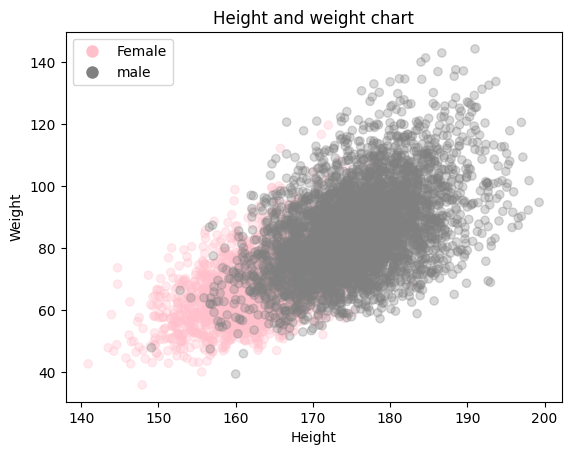

In [56]:
from matplotlib.colors import ListedColormap

cmap = ['pink','gray']
labels=['Female' ,'male']
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cmap]

plt.scatter(df['stature'], df['weightkg'] , c=df['Gender'] , cmap=ListedColormap(cmap) , alpha=0.3)
plt.title('Height and weight chart')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(handles, labels, loc='upper left')
plt.show()

In [57]:
df = df[["stature", "weightkg", "chestcircumference", "shoulderlength","biacromialbreadth","footlength", "Gender"]]
df["stature"] = pd.to_numeric(df["stature"], downcast='float')
df["weightkg"] = pd.to_numeric(df["weightkg"], downcast='float')
df["chestcircumference"] = pd.to_numeric(df["chestcircumference"], downcast='float')
df["shoulderlength"] = pd.to_numeric(df["shoulderlength"], downcast='float')
df["biacromialbreadth"] = pd.to_numeric(df["biacromialbreadth"], downcast='float')
df["footlength"] = pd.to_numeric(df["footlength"], downcast='float')
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_21720\2928951822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stature"] = pd.to_numeric(df["stature"], downcast='float')
C:\Users\USER\AppData\Local\Temp\ipykernel_21720\2928951822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weightkg"] = pd.to_numeric(df["weightkg"], downcast='float')
C:\Users\USER\AppData\Local\Temp\ipykernel_21720\2928951822.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,stature,weightkg,chestcircumference,shoulderlength,biacromialbreadth,footlength,Gender
0,156.000000,65.699997,92.199997,14.8,37.299999,24.600000,0
1,166.500000,53.400002,83.900002,14.2,37.200001,24.900000,0
2,171.100006,66.300003,87.400002,16.4,39.700001,26.500000,0
3,166.000000,78.199997,100.800003,15.7,38.400002,26.500000,0
4,157.199997,88.599998,108.900002,15.6,37.799999,24.700001,0


In [74]:
print(
    df['biacromialbreadth'].mean(),
    df['chestcircumference'].mean(),
    df['footlength'].mean(),
    df['shoulderlength'].mean() )

39.920418 102.209885 26.303362 14.507267


Train and Test

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from knn import KNN
from sklearn.metrics import accuracy_score

In [59]:
X = df.drop(["Gender"], axis=1)
y = df["Gender"]

In [60]:
X = np.array(X)
y = np.array(y)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model implementation using the main library

In [67]:
k = 3

knn_model = KNeighborsClassifier(n_neighbors=k)

In [68]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
new_point = np.array([[156, 65, 92, 14 , 39 ,24]])
new_point = np.array(new_point).reshape(1, -1)

In [76]:
result = knn_model.predict(new_point)

if result == 0:
    print('👩🏻‍💼 Female')
else:
    print('👨🏻‍💼 Male')

👩🏻‍💼 Female


In [77]:
y_pred = knn_model.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9250411861614497


In [79]:
k_values = range(3, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'k={k}, Accuracy={accuracy:.2f}')

k=3, Accuracy=0.92
k=4, Accuracy=0.92
k=5, Accuracy=0.93
k=6, Accuracy=0.92
k=7, Accuracy=0.93
k=8, Accuracy=0.93
k=9, Accuracy=0.93
k=10, Accuracy=0.93


Implementation of the model using self-made library

In [80]:
knn_model_self = KNN(k=k)
knn_model_self.fit(X_train, y_train)

In [81]:
result = knn_model_self.predict(new_point)

if result[0] == 0:
    print('👩🏻‍💼 Female')
else:
    print('👨🏻‍💼 Male')

👩🏻‍💼 Female


In [82]:
y_pred = knn_model_self.predict(X_test)

In [83]:
accuracy = knn_model_self.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9266886326194399


In [84]:
for k in k_values:
    knn = KNN(k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracies.append(knn.evaluate(y_pred, y_test))
    print(f'k={k}, Accuracy={accuracy:.2f}')


k=3, Accuracy=0.93
k=4, Accuracy=0.93
k=5, Accuracy=0.93
k=6, Accuracy=0.93
k=7, Accuracy=0.93
k=8, Accuracy=0.93
k=9, Accuracy=0.93
k=10, Accuracy=0.93


In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

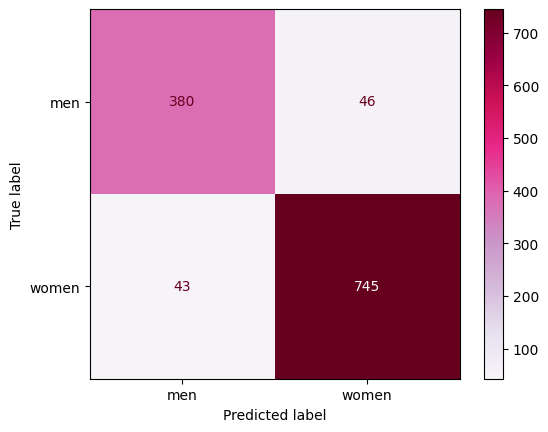

In [86]:
conf_matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['men', 'women'])
display.plot(cmap='PuRd')
plt.show()